In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rb_ratings = pd.read_csv('data/RateBeer/ratings.csv')
rb_ratings.date = pd.to_datetime(rb_ratings.date, unit='s')
rb_ratings.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26 10:00:00,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2017-02-17 11:00:00,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-06-24 10:00:00,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-01-01 11:00:00,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-23 10:00:00,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...


In [3]:
# Keep only the ratings between 2010 and 2012
rb_ratings = rb_ratings[rb_ratings.date.dt.year.isin([2010, 2011, 2012])]

In [4]:
rb_users = pd.read_csv('data/RateBeer/users.csv')
rb_users.joined = pd.to_datetime(rb_users.joined, unit='s')
rb_users.head()

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,2012-05-20 10:00:00,Poland
1,89,442761,MAGICuenca91,2017-01-10 11:00:00,Spain
2,169,288889,Sibarh,2013-11-16 11:00:00,Poland
3,3371,250510,fombe89,2013-03-22 11:00:00,Spain
4,13043,122778,kevnic2008,2011-02-02 11:00:00,Germany


In [5]:
# Remove users without a location
rb_users = rb_users[rb_users.location.notnull()]

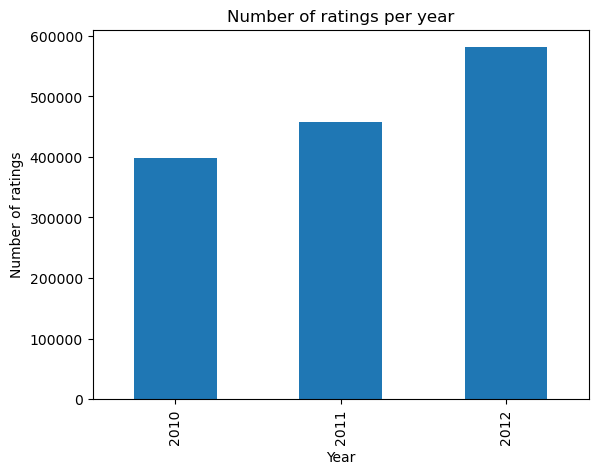

In [6]:
# Plot the distribution of the ratings per year
rb_ratings.date.dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of ratings per year')
plt.xlabel('Year')
plt.ylabel('Number of ratings')
plt.show()

In [7]:
# Join ratings and users on user_id to count the number of ratings per location
rb_ratings_per_location = rb_ratings.merge(rb_users[['user_id', 'location']], on='user_id')
rb_ratings_per_location = rb_ratings_per_location.groupby('location').count()

# Create a new column with the number of ratings per location
rb_ratings_per_location['count'] = rb_ratings_per_location['user_id']
rb_ratings_per_location = rb_ratings_per_location[['count']]

# Sort by the number of ratings
rb_ratings_per_location = rb_ratings_per_location.sort_values(by='count', ascending=False)
rb_ratings_per_location.head()

,count
location,
Denmark,151826
Canada,106594
England,78565
"United States, California",75202
Sweden,54261
